segment 0 : ((1, 6), (8, 6))
segment 1 : ((5, 5), (10, 1))
segment 2 : ((3, 2), (6, 3))
segment 3 : ((6, 4), (9, 4))
segment 4 : ((7, 1), (8, 1))


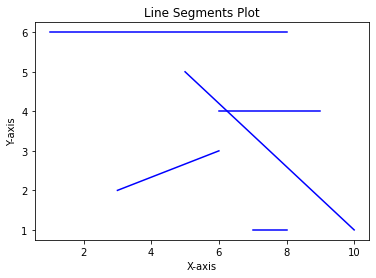

list of sorted endpoints:
 [((1, 6), 0, 'left'), ((3, 2), 2, 'left'), ((5, 5), 1, 'left'), ((6, 3), 2, 'right'), ((6, 4), 3, 'left'), ((7, 1), 4, 'left'), ((8, 1), 4, 'right'), ((8, 6), 0, 'right'), ((9, 4), 3, 'right'), ((10, 1), 1, 'right')] 

Left endpoint of line segment 0 is processed
0 is inserted into the active_segments
active_segments contains {0} 

Left endpoint of line segment 2 is processed
intersection of 2 with 0 is checked
No intersection
2 is inserted into the active_segments
active_segments contains {0, 2} 

Left endpoint of line segment 1 is processed
intersection of 1 with 0 is checked
No intersection
intersection of 1 with 2 is checked
No intersection
1 is inserted into the active_segments
active_segments contains {0, 1, 2} 

Right endpoint of line segment 2 is processed
2 is deleted from the active_segments
Left endpoint of line segment 3 is processed
intersection of 3 with 0 is checked
No intersection
intersection of 3 with 1 is checked
Intersection of 3 & 1 Found

In [2]:
import matplotlib.pyplot as plt

def onSegment(p, q, r):
    if ( (min(a[0], b[0]) <= c[0] <= max(a[0], b[0])) and 
           (min(a[1], b[1]) <= c[1] <= max(a[1], b[1])) ):
        return True
    return False


def ccw(a, b, c):
    d = (c[1]-a[1])*(b[0]-a[0]) - (b[1]-a[1])*(c[0]-a[0])

    if (d > 0):
        return 1
     
    elif (d < 0):
        return 2
     
    else:
        return 0
    

def doIntersect(p1,p2,p3,p4):
    d1 = ccw(p1, p2, p3)  
    d2 = ccw(p1, p2, p4)
    d3 = ccw(p3, p4, p1)
    d4 = ccw(p3, p4, p2)

    
    if ((d1!=d2)  and (d3!=d4)):
        return True
 
    if ((d1 == 0) and onSegment(p1, p2, p3)):
        return True

    if ((d2 == 0) and onSegment(p1, p2, p4)):
        return True 

    if ((d3 == 0) and onSegment(p3, p4, p1)):
        return True 

    if ((d4 == 0) and onSegment(p3, p4, p2)):
        return True 

    return False

def check_for_intersecting_segments(segments):
   
    n = len(segments)
    endpoints = []
    for i in range(n):
        endpoints.append((segments[i][0], i, 'left'))
        endpoints.append((segments[i][1], i, 'right'))
    endpoints.sort()
    print("list of sorted endpoints:\n",endpoints,"\n")


    active_segments = set()
    for p, idx, endpoint_type in endpoints:
        if endpoint_type == 'left':
            print("Left endpoint of line segment", idx, "is processed")
            for segment in active_segments:
                print("intersection of",idx,"with",segment,"is checked")
                if doIntersect(segments[idx][0], segments[idx][1], segments[segment][0], segments[segment][1]):
                    print("Intersection of", idx, "&", segment, "Found.\n")
                    return True
                else:
                    print("No intersection")
                
            active_segments.add(idx)
            print( idx, "is inserted into the active_segments")
            print("active_segments contains", active_segments, "\n")
        else:
            print("Right endpoint of line segment", idx, "is processed")
            active_segments.remove(idx)
            print( idx, "is deleted from the active_segments")
    
    return False



segments = [((1, 6), (8, 6)), ((5, 5), (10, 1)), ((3, 2), (6, 3)), ((6, 4), (9, 4)), ((7, 1), (8, 1))]
num = len(segments)
for i in range (num):
    print("segment", i,":", segments[i])


"""
n = eval(input('Enter number of segments:'))
segments = []
for i in range(n):
         m = input('Enter four numbers separated by a space:')
         num1, num2, num3, num4 = m.split()
         numbers = ((float(num1), float(num2)), ((float(num3), float(num4))))
         segments.append(numbers)
num = len(segments)
for i in range (num):
    print("segment", i,":", segments[i])
"""


# create a figure and axis object
fig, ax = plt.subplots()

# plot the line segments using a loop
for line in segments:
    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue')

# add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Segments Plot')

# display the plot
plt.show()


if not check_for_intersecting_segments(segments):
    print("No segments intersect.")